### About the dataset
This dataset contains automobile data and is acquired from the University of California Irvine machine learning repository: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data  
The dataset is divided into three entities:  
- the specification of an auto in terms of various characteristics 
- its assigned insurance risk rating  
- its normalized losses in use as compared to other cars

The second rating corresponds to the degree to which the auto is more risky than its price indicates.   
A thorough explanation of all features can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

### Downloading the data
I will download the dataset, pre-process it, do some exploratory data analysis and eventually build several regression models regarding available features and compare them.  

In [1]:
# import pandas library
import pandas as pd

# read the online file by the URL provider below, and assign it to variable "df"
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(path,header=None)

# show the first 5 rows using dataframe.head() method
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Let's create an accurate header's list that reflects each feature.  
The naming scheme can be found on the UCI dataset explanation.  

In [2]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
headers

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [3]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Since, we're mainly interesting in vehicle prices in order to build a regression model, let's drop all rows that don't contain price values:

In [4]:
df.dropna(subset=["price"], axis=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Exploring the dataset and data cleaning
First, let's check the data types of each column in this dataset:

In [5]:
# check the data type of data frame "df" by .dtypes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Also, let's do a quick statistical summary of each column, such as count, column mean value, column standard deviation etc.:

In [6]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


For example, the attribute "symboling" has 205 counts, the mean value of this column is 0.83, the standard deviation is 1.25, the minimum value is -2, the 25th percentile is 0, 50th percentile is 1, 75th percentile is 2, and the maximum value is 3.  
Note, that the descriptive statistics in Pandas only delivers results for numeric feature sets.  
If we want descriptive statistics of columns with type object, such as normalized losses, we have to specifically add this preference:

In [7]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


Let's convert all missing values "?" to Pandas standard missing values classifier NaN:

In [8]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Another good way to check for missing data is Pandas's function isnull():

In [9]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Let's count how many missing values there are in each column:

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, with seven columns containing missing data:

-    "normalized-losses": 41 missing data
-    "num-of-doors": 2 missing data
-    "bore": 4 missing data
-    "stroke" : 4 missing data
-    "horsepower": 2 missing data
-    "peak-rpm": 2 missing data
-    "price": 4 missing data



In order to deal with missing data, we can either drop or replace the data:
1. **Drop data**
    - drop the whole row
    - drop the whole column   


2. **Replace data**
    - replace it by mean
    - replace it by frequency
    - replace it based on other functions

Let's decide to replace the missing data by:  

**Replace by mean:**

- "normalized-losses": 41 missing data, replace them with mean
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean
- "peak-rpm": 2 missing data, replace them with mean

**Replace by frequency:**

- "num-of-doors": 2 missing data, replace them with "four" because 84% of sedans have four doors

**Drop the whole row:**

- "price": 4 missing data, delete the whole row because price is what we want to predict

Let's calculate the average of the column:

In [11]:
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)

Replace "NaN" by mean value in "normalized-losses" column:

In [12]:
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)

Let's do the same for bore:

In [13]:
avg_2=df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_2, inplace= True)

Let's do the same for stroke:

In [14]:
avg_3=df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avg_3, inplace= True)

And the 'horsepower' column:

In [15]:
avg_4=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_4, inplace= True)

Let's do the same for peak-rpm:

In [16]:
avg_5=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

Let's replace the number of doors:

In [17]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [18]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [19]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

Finally, let's drop all rows that have no price data:

In [20]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [21]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In [22]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type.   
Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'.  
For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int', however, they are shown as type 'object'.   
We have to convert data types into a proper format for each column using the "astype()" method. 

In [23]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [24]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data formatting
In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit.  
Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.
We will need to apply data transformation to transform mpg into L/100km.

The formula for unit conversion is L/100km = 235 / mpg.

In [25]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check the transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [26]:
df['highway-L/100km'] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


### Data normalization
Normalization is the process of transforming values of several variables into a similar range.  
Most machine learning models require gaussian-distributed data. Normalization helps algorithms to converge faster.  
Typical normalizations include scaling the variable that the variable average is 0, scaling the variable that the variable variance is 1, or scaling the variable so the variable values range from 0 to 1.  
Let's do some simple feature scaling on the features "length", "width" and "height":

In [27]:
# simple feature scaling: replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning the data
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.   
In the dataset, "horsepower" is a real valued variable ranging from 48 to 288, and it has 57 unique values.   
If we would only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types) then we could rearrange them into three ‘bins' to simplify the analysis.

In [28]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

In [29]:
group_names = ['Low', 'Medium', 'High']

In [30]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


Let's visualize the bins with a histogram:

Text(0.5, 1.0, 'horsepower bins')

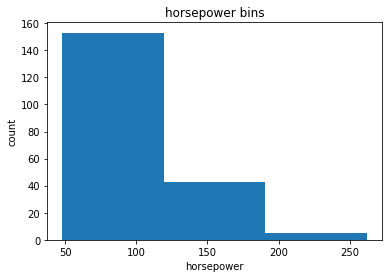

In [31]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### One-hot encoding (or turning categorical variables into numerical ones)
We see the column "fuel-type" has two unique values, "gas" or "diesel".   
Regression doesn't understand words, only numbers.  
To use this attribute in regression analysis, I will convert "fuel-type" into indicator variables.

I will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 

In [32]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


df.head()

Let's insert the dummy variable dataframe into our original dataframe:

In [33]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

Let's do the same with aspiration:

In [34]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head() 

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

### Data visualization to find patterns
Next, let's visualize the relationship between certain features to draw conclusions.  
Let's take a look at the correlation of features.  

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


A great way to visualize continuous numerical variables is by using scatterplots with fitted lines.  
In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot", which plots the scatterplot plus the fitted regression line for the data.  
Let's find the scatterplot of "engine-size" and "price":

(0, 56163.7892044872)

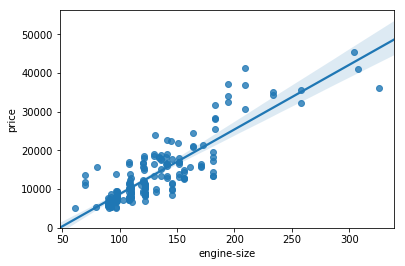

In [37]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables.   
Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.  
When we examine the numerical value of the correlation between 'engine-size' and 'price', we can see it's approximately 0.87, which is a value for strong positive correlation:

In [38]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway L/100km is a potential predictor variable of price: 

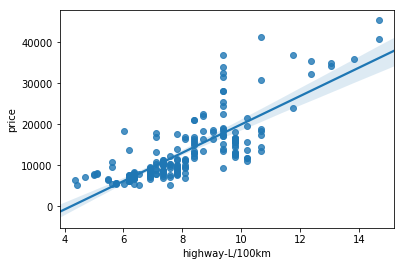

In [39]:
sns.regplot(x="highway-L/100km", y="price", data=df)

As the highway-mpg goes up, the price goes up: this indicates an positive relationship between these two variables.   
Highway L/100km could potentially be a predictor of price.

In [40]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


Let's see if "Peak-rpm" as a predictor variable of "price":

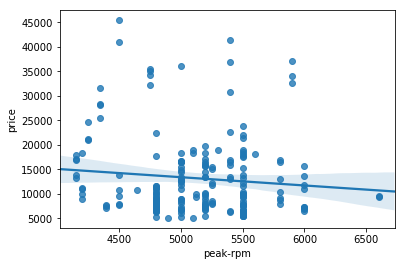

In [41]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price since the regression line is close to horizontal.   
Also, the data points are widely scattered and far from the fitted line, showing lots of variability.  
We can examine the correlation between 'peak-rpm'  and 'price'and see it is approximately  -0.101616: 

In [42]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Similarly, "stroke" doesn't seem to be a good indicator of price:

In [43]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


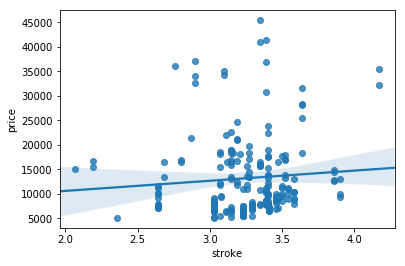

In [44]:
sns.regplot(x="stroke", y="price", data=df)

Let's visualize some categorical variables.  
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories.   
The categorical variables can have the type "object" or "int64".   
A good way to visualize categorical variables is by using boxplots.

Let's look at the relationship of "body-style" and "price":

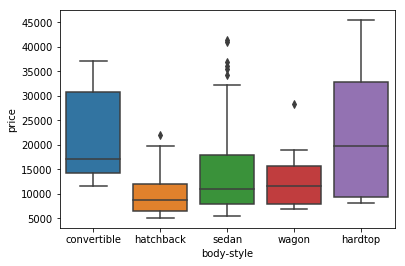

In [45]:
sns.boxplot(x="body-style", y="price", data=df)

Clearly, the distribution of "price" between the different "body-style" categories have a significant overlap.  
Hence, "body-style" would not be a good predictor of price.   
Let's examine engine "engine-location" and "price" :

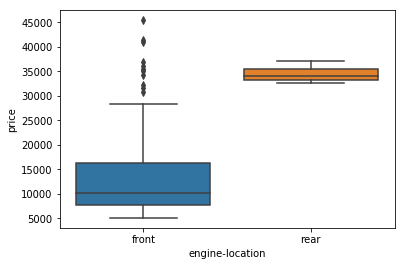

In [46]:
sns.boxplot(x="engine-location", y="price", data=df)

The distribution of price between the two engine locations, front and rear, are not overlapping.   
Engine-location is a potential predictor of price.   
Let's examine "drive-wheels":

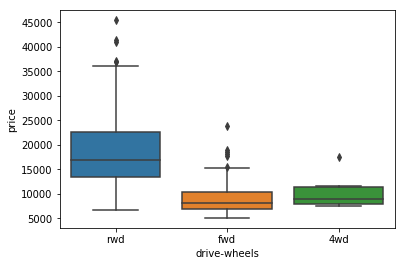

In [47]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

The distribution of price between the different drive-wheels categories differs, even if only slightly.  
As such, drive-wheels could be a predictor of price.

### Grouping features
Value-counts is a good way of understanding how many units of each characteristic/variable we have.  
Let's apply the "value_counts" method on the column 'drive-wheels'. 

In [48]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Let's add that series to a Pandas dataframe and rename the index to 'drivewheels':

In [49]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Let's do the same to the feature "engine-location":

In [50]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location, it would not be a good predictor variable for the price because of the limited datapoints.   

The "groupby" method groups data by different categories.  
The data is grouped based on one or several variables, and analysis is performed on the individual groups.

If we want to know which type of drive wheel is the most valuable on average, we can group "drive-wheels" and then average them.  
Let's select the columns 'drive-wheels', 'body-style' and 'price' and then assign them to the variable "df_group_one" for grouping.

In [51]:
df_group_one=df[['drive-wheels','body-style','price']]

In [52]:
# grouping results

df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Judging the data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.  
Note that we only have 8 vehicle datasets for 4wd vehicles, therefore the statistics might be skewed.

We can also group with multiple variables.  
For example, let's group by both 'drive-wheels' and 'body-style'.   
This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.   
We can store the results in the variable 'grouped_test1':

In [53]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table.  
A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row.   
We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, I will take the "drive-wheels" variable for the table rows and pivot body-style as the columns of the table:

In [54]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, due to limited data sets, there isn't data for some of the pivot cells.  
These missing cells can be filled with the value 0 or any other value that seems proper.  

In [55]:
grouped_pivot=grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's use a heat map to visualize the relationship between "body-style" and "drive-wheels" with "price" as heat:

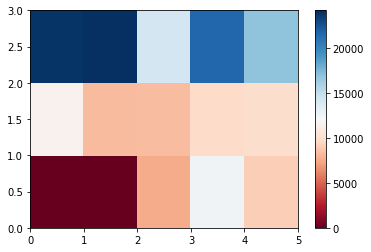

In [57]:
import matplotlib.pyplot as plt

#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis, respectively.  
This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.   
The default labels convey no useful information to us.   
Let's change that using the artist layer of matplotlib:

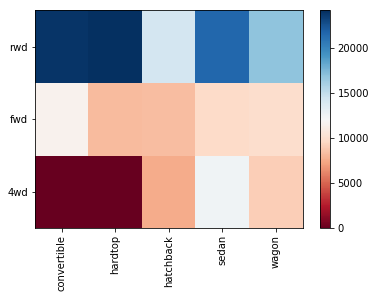

In [58]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Correlation
The main question to answer in this section is: "What are the main characteristics which have the most impact on the car price?"

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price.  
In other words, how is the car price dependent on a variable?

The Pearson Correlation measures the linear dependence between two variables, X and Y.   
The resulting coefficient is a value between -1 and 1 inclusive, where:

-    1: total positive linear correlation,
-    0: no linear correlation, the two variables most likely do not affect each other
-    -1: total negative linear correlation.

Pearson Correlation is the default method of the Pandas function "corr".  
As before, we can calculate the Pearson correlation of the 'int64' or 'float64' variables in the dataframe:

In [59]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


It is very important to know the significance of the correlation estimate.

The P-value is the probability value that the correlation between two variables is statistically significant.   
Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the p-value is:

-    < 0.001; there is strong evidence that the correlation is significant,
-    < 0.05; there is moderate evidence that the correlation is significant,
-    < 0.1; there is weak evidence that the correlation is significant, and
-    \> 0.1; there is no evidence that the correlation is significant.

The p-value can be calculated via the stats library in Python.  
Let's calculate the Pearson Correlation Coefficient and the P-value of 'wheel-base' and 'price':

In [60]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the positive linear relationship isn't extremely strong (~0.585).

Let's take a look at a couple other features:

In [68]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P = 6.369057428260101e-48


In [69]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P = 8.016477466159328e-30


In [70]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


In [71]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P = 2.189577238894065e-53


In [72]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


In [73]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P = 8.049189483935489e-17


In [75]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.8011176263981974  with a P-value of P = 3.046784581041456e-46


### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups.  
ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score.   
A larger score means there is a larger difference between the means.

**P-value**: P-value tells us the statistical significance of our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.  

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy.   
Because the ANOVA algorithm averages the data automatically, we do not need to take the average before-hand.

Let's see if different types 'drive-wheels' impact 'price'. We group the data:


In [76]:
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value of the "drive-wheels" group:

In [77]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0, implying almost certain statistical significance.   
But it does not show that all three tested groups are this highly correlated.

If we only examine 4wd and fwd vehicles, the F-test score clearly shows that there is no clear difference between these groups:

In [78]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


Alternatively, we could calculate the two-sided t-test:

In [84]:
from scipy.stats import ttest_ind

f_val, p_val = stats.ttest_ind(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("T-test statistic results: T=", f_val, ", P =", p_val)  

T-test statistic results: T= 0.8157608413329865 , P = 0.4162011669784619


Most likely, this is a result of a lack of 4wd vehicle data, since the price for 4wd and fwd vehicles should differ significantly due to drivetrain complexity.

On the other hand, rwd and fwd vehicles, display a significant difference between each group:

In [70]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.553316096 , P = 2.23553063557e-23


In [83]:
from scipy.stats import ttest_ind

f_val, p_val = stats.ttest_ind(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print("T-test statistic results: T=", f_val, ", P =", p_val)  

T-test statistic results: T= -11.425993002619556 , P = 2.2355306355677783e-23


### Conclusion
Now, we have a better idea of what our data looks like and which variables are important to take into account when predicting the car price.   
We have narrowed it down to the following variables:

**Continuous numerical variables**:

-    Length
-    Width
-    Curb-weight
-    Engine-size
-    Horsepower
-    City-mpg
-    Highway-mpg
-    Wheel-base
-    Bore

**Categorical variables**:

-    Drive-wheels

Let's move towards building machine learning models to automate our analysis.  
By feeding the model with above variables that meaningfully affect the target variable "price" will improve the model's prediction performance.


### Model development
First, let's take a look at simple linear regression.  
Let's load the scikit-learn library and create a linear regression object.


In [71]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's feed this linear regression model with "highway-L/100km" as the predictor variable and the "price" as the response variable.

In [72]:
X = df[['highway-L/100km']]
Y = df['price']

In [73]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The linear regression model has been fitted with the X and Y variables.  
We can use this model to predict the prices of different vehicles in regards to the highway-L/100km values in the feature set X or set up an equation:

In [74]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([ 15485.52737455,  15485.52737455,  16643.34931414,  12475.19033163,
        22327.2024721 ])

In [75]:
lm.intercept_

-14617.843054664598

In [76]:
lm.coef_

array([ 3458.68511314])

Apparently, the estimated linear model follows the equation:  
**price** = -14617.84 + 3458.69 x  **highway-L/100km**

Let's use a multiple linear regression model which explains the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.   
Most of the real-world regression models involve multiple predictors.  
From the previous section we know that other good predictors of price could be:

-    Horsepower
-    Curb-weight
-    Engine-size
-    Highway-L/100km

Let's develop a model using these variables as the predictor variables.


In [77]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [78]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
lm.intercept_

-14386.530839268129

In [80]:
lm.coef_

array([  36.60566451,    3.50008296,   85.38595269,  500.93378897])

The estimated multilinear model follows the equation:  
Price = -14386.53 + 36.61 x horsepower + 3.5 x curb-weight + 85.39 x engine-size + 500.93 x highway-L/100km


### Model evaluation using visualization

When it comes to simple linear regression, an excellent way to visualise the fit of our model is by using regression plots.  

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data.   
This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).  

Let's start with simple linear regression and visualize highway-L/100km as potential predictor variable of price:

(0, 47823.599643684269)

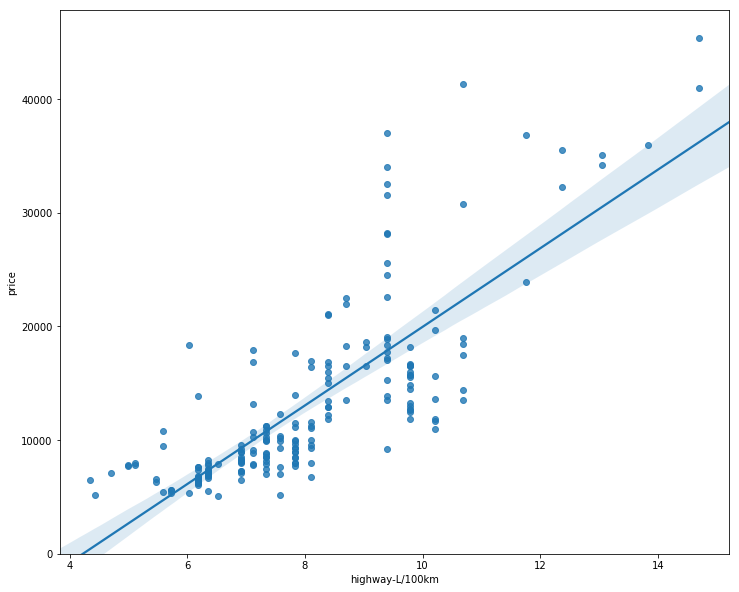

In [81]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is positively correlated to highway-L/100km, since the regression slope is positive.  
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line.   
This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not.   
If the data is too far off from the line, this linear model might not be the best model for this data. 


A good way to visualize the variance of the data is to use a residual plot.  
The difference between the observed value (y) and the predicted value (Yhat) is called the residual.   
When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.  
If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data because the variance would be constant.


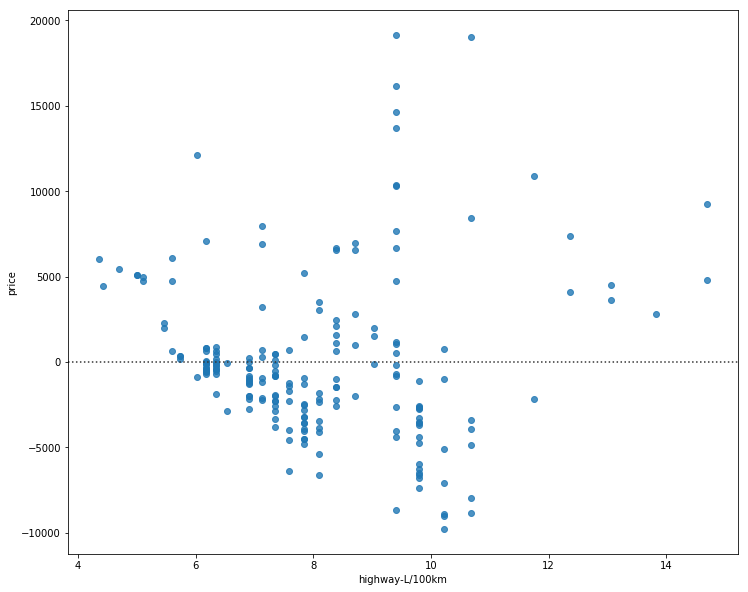

In [82]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-L/100km'], df['price'])
plt.show()

From this residual plot we can see that the residuals are not randomly spread around the x-axis.   
Maybe a non-linear model is more appropriate for this data.

For multilinear regression models, we need a different approach.  
We can look at the distribution plot, namely the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.  

In [83]:
Y_hat = lm.predict(Z)

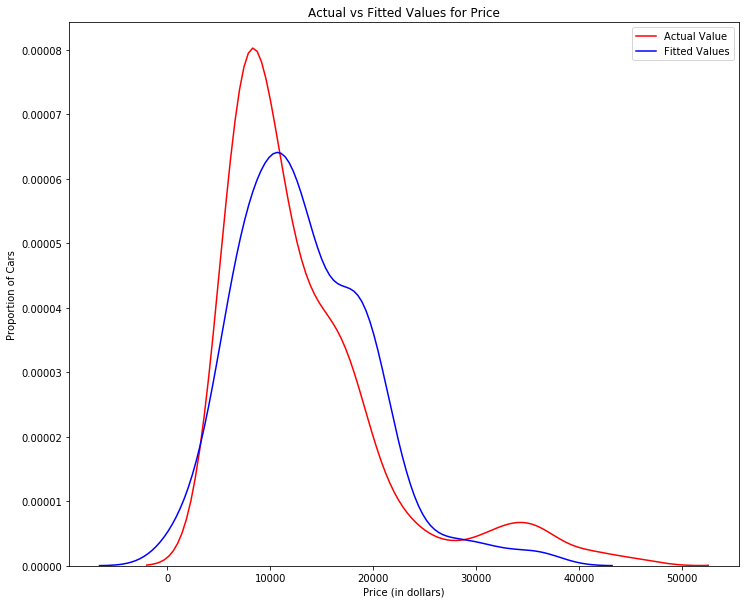

In [84]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit.   
However, there is definitely some room for improvement.

### Polynomial regression and pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.   
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.  
We saw earlier that a linear model did not provide the best fit while using highway-L/100km as the predictor variable.   
Let's see if we can try fitting a polynomial model to the data instead.  
Let's define a function to plot the data:

In [85]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(1, 15, 200)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [86]:
x = df['highway-L/100km']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the numpy function poly1d to display the polynomial function.

In [87]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


Let's plot the function:

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


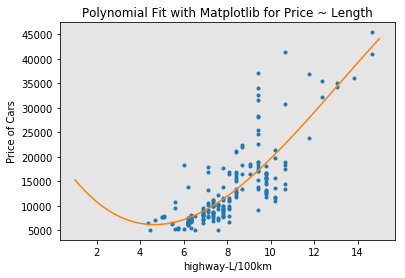

In [88]:
PlotPolly(p,x,y, 'highway-L/100km')

We can already see from plotting that this polynomial model performs better than the linear model.   
This is because the generated polynomial function "hits" more of the data points.

The analytical expression for multivariable polynomial functions gets complicated.  
For example, the expression for a second-order (degree=2) polynomial with two variables is given by:
\begin{equation*}
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
\end{equation*}

 We can perform a polynomial transform on multiple features.  
 Let's create a PolynomialFeatures object of degree 2: 

In [89]:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [90]:
Z_pr=pr.fit_transform(Z)

Originally, we had 4 features, now we have 15:

In [91]:
Z.shape

(201, 4)

In [92]:
Z_pr.shape

(201, 15)

Data Pipelines simplify the steps of processing the data.   
We use the module Pipeline to create a pipeline.   
We also use StandardScaler as a step in our pipeline.  

Let's create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor. 

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

With a pipeline, the data becomes normalized, transformed and fitted, simultaneously:

In [94]:
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously:

In [95]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([ 12395.42815338,  12395.42815338,  18421.01425398,   9978.89064447])

### Measures for In-Sample Evaluation
Two very important measures that are often used in statistics to determine the accuracy of a model are:

-    R^2 / R-squared
-    Mean Squared Error (MSE)

**R-squared**

R-squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.   
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The mean squared error measures the average of the squares of errors, as in, the difference between actual value (y) and the estimated value (ŷ).


Let's calculate the R-squared for the simple linear regression model:

In [96]:
#highway_L/100km_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.64178945132588183

Apparently ~ 64.18% of the variation of the price is explained by this simple linear model of fitting the "L/100km".  
Let's calculate the MSE.  
We can predict the output i.e., "yhat" using the predict method, where X is the input variable:  


In [97]:
Yhat=lm.predict(X)
Yhat[0:4]

array([ 15485.52737455,  15485.52737455,  16643.34931414,  12475.19033163])

In [98]:
from sklearn.metrics import mean_squared_error

#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yhat)

22510543.777085222

Let's take a look at the multi linear regression model:

In [99]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])

0.8118005191488038

We can say that ~ 81.18 % of the variation of price is explained by this multiple linear regression model.  
Also, let's find the MSE:

In [100]:
Y_predict_multifit = lm.predict(Z)
mean_squared_error(df['price'], Y_predict_multifit)

11826766.878324663

Let's take a look at the polynomial regression model:

In [101]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
r_squared

0.67535816608121713

In [102]:
mean_squared_error(df['price'], p(x))

20401030.180019394

### Conclusion
Now that we have visualized the different models and generated the R-squared and MSE values for the fits, let's determine the best model.  
When comparing models, the model with the higher R-squared value is a better fit for the data.
When comparing models, the model with the smallest MSE value is a better fit for the data.  
Let's take a look at the values for the different models.

Simple Linear Regression: Using L/100km as a predictor variable of price.

-    R-squared: 0.64
-    MSE: 2.25 x10^7

Multiple Linear Regression: Using horsepower, curb-weight, engine-size and highway-L/100km as predictor variables of price.

-    R-squared: 0.81
-    MSE: 1.18 x10^7

Polynomial Fit: Using Highway-L/100km as a predictor variable of price.

-    R-squared: 0.72
-    MSE: 1.75 x 10^7

Usually, the more variables you have, the better your model is at predicting, but this is not always true.   
Sometimes there is not enough data or we run into numerical problems, or many of the variables may not be useful and or even act as noise.    
As a result, it is important to always check the MSE and R^2. 

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset.   
This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price. 


### Model refinement
We have built models and made predictions of vehicle prices.   
Now we will determine how accurate these predictions are.  
First let's only use numeric data:

In [103]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

df=df._get_numeric_data()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Let's define the functions for plotting:

In [104]:
def DistributionPlot(RedFunction,BlueFunction,RedName,BlueName,Title ):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    

In [105]:
def PolyPlot(xtrain,xtest,y_train,y_test,lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(),xtest.values.max()])

    xmin=min([xtrain.values.min(),xtest.values.min()])

    x=np.arange(xmin,xmax,0.1)


    plt.plot(xtrain,y_train,'ro',label='Training Data')
    plt.plot(xtest,y_test,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()


An important step in testing the model is to split the data into training and testing data.   
Let's place the target data price in a separate dataframe y and drop it from the feature set:

In [106]:
y_data=df['price']
x_data=df.drop('price',axis=1)

Let's split the data randomly into training and testing data via sklearn's train_test_split function:

In [107]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [108]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression()
lre.fit(x_train[['highway-L/100km']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's calculate the R^2 again, this time on the test data:

In [109]:
lre.score(x_test[['highway-L/100km']],y_test)

0.68823670783953828

We can see the R^2 is much smaller using the training data:

In [110]:
lre.score(x_train[['highway-L/100km']],y_train)

0.6324303243929843

Sometimes there is simply not have sufficient testing data.  Especially, when a low test_size percentage is specififed.  
Here it is important to perform cross-validation.   
Let's go over several methods that can be used for cross-validation.  
Let's take a look at 4 folds:

In [111]:
from sklearn.model_selection import cross_val_score

Rcross=cross_val_score(lre,x_data[['highway-L/100km']], y_data,cv=4)

In [112]:
Rcross

array([ 0.73640353,  0.68681949,  0.38592724,  0.42298701])

We can calculate the average and standard deviation of our estimate:

In [113]:
print("The mean of the folds are", Rcross.mean(),"and the standard deviation is" ,Rcross.std())

The mean of the folds are 0.558034318613 and the standard deviation is 0.155128831115


We can also use the function 'cross_val_predict' to predict the output.   
The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data.   
First import the function:

In [114]:
from sklearn.model_selection import cross_val_predict

yhat=cross_val_predict(lre,x_data[['highway-L/100km']], y_data,cv=4)
yhat[0:5]

array([ 15066.2262607 ,  15066.2262607 ,  16132.56351475,  12293.74940017,
        21367.31003463])

### Overfitting, Underfitting and Model Selection
As we saw before, sometimes the test data (or out of sample data) is a better measure of how well the model performs in the real world.   
One reason for this is overfitting.   
Apparently, these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.  

Let's create Multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-L/100km' as features:

In [115]:
lr=LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Prediction using training data:

In [116]:
yhat_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_train[0:5]

array([ 12077.74341414,  11552.0330496 ,   6529.21765047,  21692.22582472,
        16206.36048412])

Prediction using test data:

In [117]:
yhat_test=lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_test[0:5]

array([ 11075.90858241,   5885.35354127,  11296.12260019,   6891.63744915,
        15339.68680335])

Let's perform some model evaluation using our training and testing data separately.   
Let's examine the distribution of the predicted values of the training data:

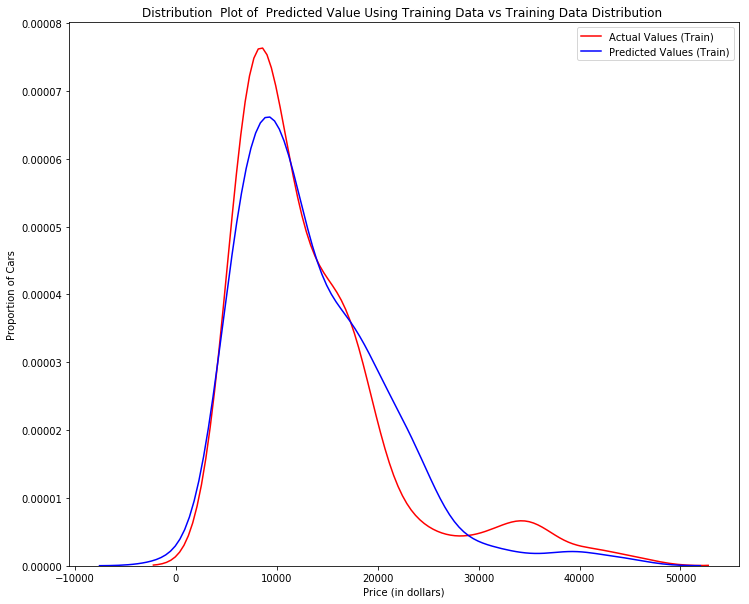

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution '
DistributionPlot(y_train,yhat_train,"Actual Values (Train)","Predicted Values (Train)",Title)

So far the model seems to be doing well in learning from the training dataset.   
But what happens when the model encounters new data from the testing dataset?   
When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values:

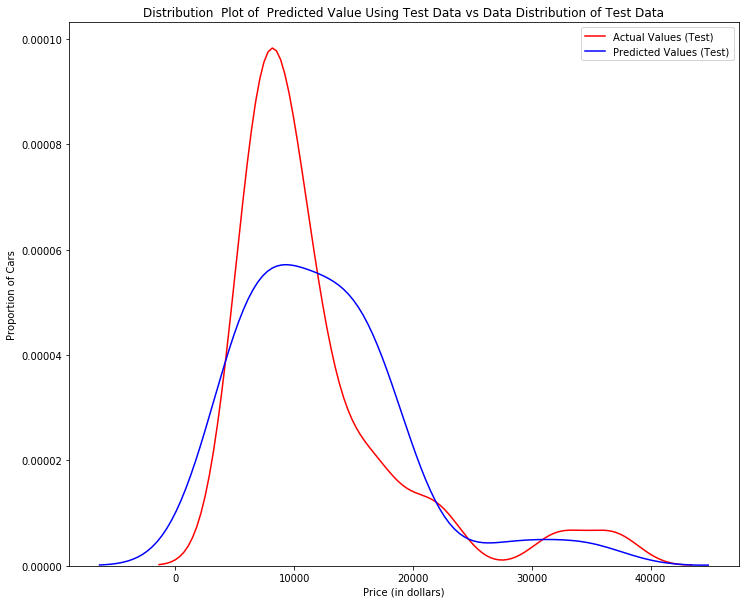

In [119]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data.  
This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000.   
This is where the distribution shape is exceptionally different.   
Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.  

### Overfitting
Let's take a closer look at overfitting.  
Note that overfitting occurs when the model fits the noise, not the underlying process.   
Therefore, when testing the model using the test-set, the model does not perform as well as it is modelling noise, not the underlying process that generated the relationship.   
Let's create a degree 5 polynomial model for the feature "horsepower" with 45 percent of the data for testing and the rest for training:


In [127]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [128]:
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We can see the output of our model using the method "predict", then assign the values to "yhat":

In [129]:
yhat=poly.predict(x_test_pr )
yhat[0:5]

array([  6728.74969264,   7308.07249892,  12213.81934053,  18893.10904657,
        19995.78964951])

Let's take the first five predicted values and compare it to the actual targets:

In [130]:
print("Predicted values:", yhat[0:4])
print("True values:",y_test[0:4].values)

Predicted values: [  6728.74969264   7308.07249892  12213.81934053  18893.10904657]
True values: [  6295.  10698.  13860.  13499.]


I will use the function "PolyPlot" that was defined at the beginning of this notebook to display the training data, testing data, and the predicted function:

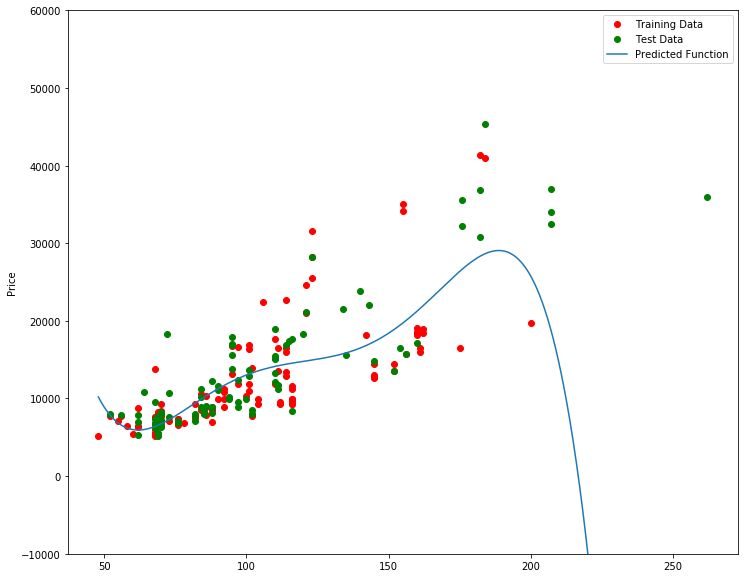

In [131]:
PolyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

We see that the estimated function appears to track the data but at around 200 horsepower, the function begins to diverge from the data points. 

R^2 of the training data:

In [132]:
poly.score(x_train_pr, y_train)

0.55677169015314443

 R^2 of the test data:

In [134]:
poly.score(x_test_pr, y_test)

-29.871686791475959

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.   
The lower the R^2, the worse the model; a Negative R^2 is a sign of overfitting.  

Let's see how the R^2 changes on the test data for different order polynomials and plot the results:

Text(3,0.75,'Maximum R^2 ')

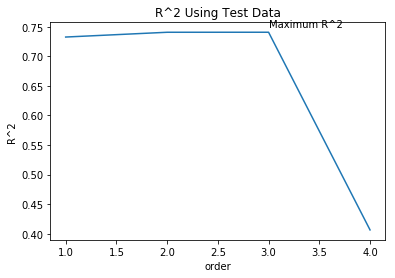

In [135]:
Rsqu_test=[]

order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr=pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr,y_train)
    
    Rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.  

Let's define a function for polynomial regression:

In [137]:
def f(order,test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr=PolynomialFeatures(degree=order)
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    poly=LinearRegression()
    poly.fit(x_train_pr,y_train)
    PolyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)


Let's try a 6th order polynomial:

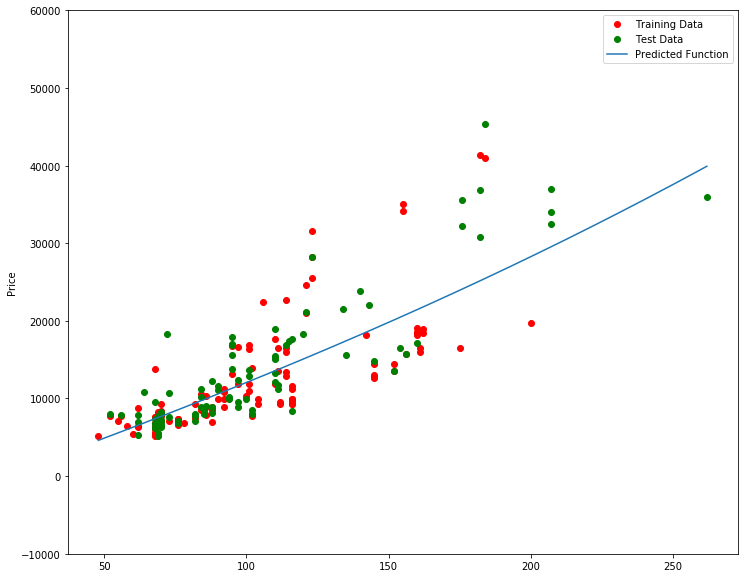

<function __main__.f>

In [138]:
interact(f, order=(0,6,1),test_data=(0.05,0.95,0.05))

### Ridge Regression
Let's take a look at Ridge Regression.   
We will see how the parameter Alpha changes the model.  
Note, the test data will be used as validation data.  

Let's start with a degree 2 polynomial and a regularization parameter of 0.1:

In [139]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [140]:
from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr,y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0297159799205436e-16 / 1.1102230246251565e-16
  RuntimeWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [141]:
yhat=RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [  6567.83081933   9597.97151399  20836.22326843  19347.69543463]
test set : [  6295.  10698.  13860.  13499.]


Let's write a for loop to select the alpha that minimizes the test error:

In [143]:
Rsqu_test=[]
Rsqu_train=[]
dummy1=[]
ALFA=5000*np.array(range(0,10000))
for alfa in ALFA:
    RigeModel=Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr,y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr,y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr,y_train))

Let's plot the value of R^2 for the different alpha's:

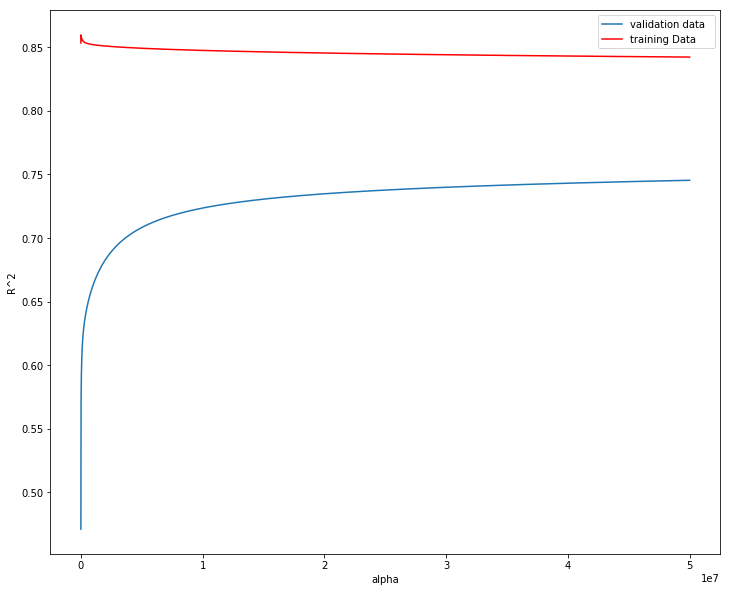

In [144]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test,label='validation data  ')
plt.plot(ALFA,Rsqu_train,'r',label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


The red line in this figure represents the R^2 of the test data.  
As Alpha increases, the R^2 decreases.   
Therefore, as Alpha increases, the model performs worse on the test data.   
The blue line represents the R^2 on the validation data, as the value for Alpha increases the R^2 decreases.   


### Grid search
Alpha is a hyperparameter.  The higher the alpha, the less weight higher order polynomials carry.  
It prevents overfitting of noise.      
Scikit-learn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.  
Let's import GridSearchCV from the module model_selection and create a dictionary of parameter values:


In [145]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [146]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The object finds the best parameter values on the validation data.   
We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [147]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Let's test the model on the test data:

In [148]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)

0.84116498310361498

Apparently, the best RR model was with alpha = 10000 (strong regularization) and an R^2 of 0.84.